In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

#This has home prices as your y_is and x_is and contains a bunch of features related to homes
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from datetime import datetime

In [2]:
#Load boston homes data
boston = load_boston()
print('This dataset contains data about {} homes and each containing {} features about them'. format(*boston.data.shape))

This dataset contains data about 506 homes and each containing 13 features about them


In [3]:
bos = pd.DataFrame(boston.data)
print(bos.head())
#Add y_is to the dataframe
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
y = bos['PRICE']

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [4]:
def normalize(X):
    mean = np.mean(X)
    std_dev = np.std(X)
    
    X = ((X - mean)/std_dev)
    return X, mean, std_dev

In [6]:
def add_intercept_term(X):
    m = len(X)
    ones = np.ones((m,1))
    X = np.hstack((ones, X))
    return X

In [30]:
def computeCost(X, y, W):
    m = len(y)
    error = (np.sum((np.dot(X, W) - y)**2))/(2*m)
    mse = (1.0/m) * np.sum(np.power(error, 2))
    return mse

In [28]:
def plot_errors(errors):
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(range(len(errors)), errors, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Error')
    ax.set_title('Error vs. Training Epoch')

In [50]:
def stochastic_gradient_descent(W, alpha, train, scaler,tolerance, batch_size=50, scale_values=True, decay_lr=False):
    # Perform Gradient Descent
    iterations = 1
    errors = []
    min_error = 10000000000000
    while True:
        random_subset = train.sample(n=batch_size)
        X_train = random_subset.drop('PRICE', axis = 1)

        if scale_values:
            X_std_train = scaler.transform(X_train)
            X_std_train = add_intercept_term(X_std_train)
        else:
            X_std_train = X_train.values
            
        y_train = random_subset['PRICE']
        
        m = len(y_train.values)
        
        new_W = W - (alpha/m)*np.sum((np.dot(X_std_train, W) - y_train)[:,None]* X_std_train, axis=0)
        
        mse = computeCost(X_std_train, y_train.values, new_W)

        errors.append(mse)

        # Stopping Condition
        mse_tolerance = 10
        if (np.sum(abs(new_W - W)) < tolerance) or (mse < mse_tolerance):
            if np.sum(abs(new_W - W)) < tolerance:
                print ("Converged because we reached the tolerance limit")
            elif mse < mse_tolerance:
                print ("Converged because error is less than {}".format(mse_tolerance))
            print ("Iteration: %d - Mean Squared: %.4f" %(iterations, mse))
            break

        # Print error every 1000 iterations
        if iterations % 1000 == 0:
            print ("Iteration: %d - Mean Squared Error: %.4f" %(iterations, mse))

        if iterations % 100000 == 0:
            ist = datetime.now()
            print (format(ist, '%H:%M:%S'))

        #reduce learning rate by 1/2 every 100 iterions
        if iterations % 10000 == 0:
            print ('Mean Squared Error at iteration {} is {}'.format(iterations, mse))
        if decay_lr:
            print ('Reducing learning rate from {} to {}'.format(alpha, alpha/2))
            alpha = alpha/(iterations+1)
                
        iterations += 1
        W = new_W
    return W, errors

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)
print('X shape is {}. X_train shape is {}. y_train is {}. \nX_test is {} and y_test is {}'.\
      format(X.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X shape is (506, 13). X_train shape is (339, 13). y_train is (339,). 
X_test is (167, 13) and y_test is (167,)


11:48:14
Iteration: 1000 - Mean Squared Error: 1193.4626
Iteration: 2000 - Mean Squared Error: 777.8389
Iteration: 3000 - Mean Squared Error: 603.2802
Iteration: 4000 - Mean Squared Error: 304.3972
Iteration: 5000 - Mean Squared Error: 330.3958
Iteration: 6000 - Mean Squared Error: 171.0974
Iteration: 7000 - Mean Squared Error: 166.8009
Iteration: 8000 - Mean Squared Error: 52.6786
Iteration: 9000 - Mean Squared Error: 88.5842
Iteration: 10000 - Mean Squared Error: 25.0334
Mean Squared Error at iteration 10000 is 25.0333891749439
Iteration: 11000 - Mean Squared Error: 42.4449
Converged because error is less than 10
Iteration: 11141 - Mean Squared: 9.2762
Weights is [-0.58765092  0.97878447 -0.20004876  0.69859108  0.06818386  3.34940405
  0.15290504  0.25397873 -0.01754282 -0.49103406 -1.21920384  1.3133417
 -1.78684111]
Intercept term is [15.47244145]
Mean Squared Error predicting test data is 11.71087529291574


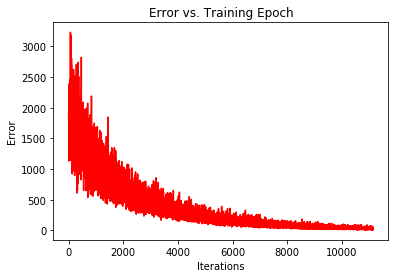

In [51]:
#With standardization

scaler = StandardScaler().fit(X_train)

df_train = pd.concat([X_train, y_train], axis=1)

# alpha = 0.0000000000000001
# alpha = 0.000001

# Use this alpha for non-scaled values. Ensure scale_values is set to False below
alpha = 0.0001

# tolerance = 1e-5
tolerance = 1e-15
batch_size = 50
scale_values = True
if scale_values:
    #we will be adding the 'ones' column 
    W = np.ones(X_train.shape[1]+1)
else:
    W = np.ones(X_train.shape[1])

decay_lr = False

ist = datetime.now()
print (format(ist, '%H:%M:%S'))

W, errors = stochastic_gradient_descent(W, alpha, df_train, scaler, tolerance, batch_size, scale_values, decay_lr)

print ('Weights is {}'.format(W[1:]))
print ('Intercept term is {}'.format(W[0:1]))

if scale_values:
    X_std_test = scaler.transform(X_test)
    X_std_test = add_intercept_term(X_std_test)
else:
    X_std_test = X_test.values
    
# mse = get_gradient(W, X_std_test, y_test.values)[1]
mse = computeCost(X_std_test, y_test.values, W)
print("Mean Squared Error predicting test data is {}".format(mse))
plot_errors(errors)

In [41]:
reg = LinearRegression(normalize=True).fit(X_train, y_train)
score = reg.score(X_train, y_train)
weights = reg.coef_
intercept = reg.intercept_ 
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print ('Mean Squared error using Linear Regression from Sklearn is {}'.format(mse))
print ('Weights returned from SKLearn is {}'.format(weights))
print ('Intercept term returned from SKLearn is {}'.format(intercept))

Mean Squared error using Linear Regression from Sklearn is 28.541367275618253
Weights returned from SKLearn is [-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
 -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
  3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
 -4.72644280e-01]
Intercept term returned from SKLearn is 32.858932634086386


## Mean Squared error using Linear Regression from Sklearn is 28.541367275618253
## Mean Squared error using SGD implemented by me is 11.71087529291574